<a href="https://colab.research.google.com/github/jagatabhay/miscellaneous/blob/master/PythonModularapproach_Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torch.optim as optim
import time
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/jagatabhay/TSAI.git

Cloning into 'TSAI'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 367 (delta 6), reused 0 (delta 0), pack-reused 355
Receiving objects: 100% (367/367), 2.43 MiB | 4.72 MiB/s, done.
Resolving deltas: 100% (171/171), done.


In [0]:
from TSAI.S11 import CustomResNet

In [4]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = CustomResNet.CustomResNet().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

/content/TSAI/S11/CustomResNet.py:57: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [5]:
from TSAI.S11 import albumentationstransform
albumentationstransform_train_transforms = albumentationstransform.train_transforms()
from TSAI.S11 import dataloader
trainloader , testloader = dataloader.datasetloader(albumentationstransform_train_transforms , batchsize = 512 , numwork = 4 )
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

REQUIRED LIBRARIES LOADED...


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
INFO : Trainloader and Testloader Done


  car   car  ship  frog


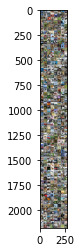

In [6]:
import numpy as np
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = next(iter(trainloader))
images, labels = dataiter

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
from TSAI.S11 import traindataset
print("Devive : ", device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.95,weight_decay = 0.01)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01,div_factor = 6 ,
                                                cycle_momentum = True , epochs=24, steps_per_epoch = len(trainloader))

traindataset.traindataset(range_ = 3 , model = model , device = device , 
                          trainloader = trainloader , optimizer = optimizer  , criterion_ = criterion ,
                          batchsize = 512 )

Devive :  cuda


/content/TSAI/S11/CustomResNet.py:57: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


[1,    97] loss: 1.695
[2,    97] loss: 1.111
[3,    97] loss: 0.892
INFO : Finished Training of Dataset 


In [8]:
from TSAI.S11 import testdataset
testdataset.testdataset(model = model , device = device , testloader = testloader )

/content/TSAI/S11/CustomResNet.py:57: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of the Network on the 10000 test images: 70 %
